<a href="https://colab.research.google.com/github/Gowthamvel7112/Array-manipulation-/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve,auc)

In [9]:
from google.colab import files
data=files.upload()

Saving Obfuscated-MalMem2022.csv.zip to Obfuscated-MalMem2022.csv (1).zip


In [11]:
df=pd.read_csv("Obfuscated-MalMem2022.csv (1).zip")
print("dataset loaded successfully!")
print(df.head())

dataset loaded successfully!
  Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
0   Benign            45            17           10.555556   
1   Benign            47            19           11.531915   
2   Benign            40            14           14.725000   
3   Benign            32            13           13.500000   
4   Benign            42            16           11.452381   

   pslist.nprocs64bit  pslist.avg_handlers  dlllist.ndlls  \
0                   0           202.844444           1694   
1                   0           242.234043           2074   
2                   0           288.225000           1932   
3                   0           264.281250           1445   
4                   0           281.333333           2067   

   dlllist.avg_dlls_per_proc  handles.nhandles  handles.avg_handles_per_proc  \
0                  38.500000              9129                    212.302326   
1                  44.127660             11385                    242.2

In [13]:
x=df.drop("Class",axis=1)
y=df["Class"]

In [14]:
from pandas.core.arrays import categorical
numeric_cols=x.select_dtypes(include=['int64','float64']).columns
categorical_cols=x.select_dtypes(include=['object']).columns

In [15]:
from sklearn import preprocessing
preprocessing=ColumnTransformer(transformers=[("num","passthrough",numeric_cols)])

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

model = Pipeline([
    ("preprocess", preprocessing),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split # Make sure train_test_split is imported

df=pd.read_csv("Obfuscated-MalMem2022.csv (1).zip")
print("dataset loaded successfully!")
print(df.head())

# Define x and y (moved from lOImoOSqXNQn)
x=df.drop("Class",axis=1)
y=df["Class"]

# Redefine numeric_cols and categorical_cols
numeric_cols=x.select_dtypes(include=['int64','float64']).columns
categorical_cols=x.select_dtypes(include=['object']).columns

# Redefine preprocessing
preprocessing=ColumnTransformer(transformers=[("num","passthrough",numeric_cols)])

model = Pipeline([
    ("preprocess", preprocessing),
    ("classifier", RandomForestClassifier(n_estimators=50, random_state=42)) # Reduced n_estimators
])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model.fit(x_train,y_train)
print("\nmodel training completed!")

dataset loaded successfully!
  Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
0   Benign            45            17           10.555556   
1   Benign            47            19           11.531915   
2   Benign            40            14           14.725000   
3   Benign            32            13           13.500000   
4   Benign            42            16           11.452381   

   pslist.nprocs64bit  pslist.avg_handlers  dlllist.ndlls  \
0                   0           202.844444           1694   
1                   0           242.234043           2074   
2                   0           288.225000           1932   
3                   0           264.281250           1445   
4                   0           281.333333           2067   

   dlllist.avg_dlls_per_proc  handles.nhandles  handles.avg_handles_per_proc  \
0                  38.500000              9129                    212.302326   
1                  44.127660             11385                    242.2

In [20]:
y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test)

In [23]:
from os import read
from sklearn.metrics import roc_auc_score
import numpy as np # Import numpy

# Get the classes from the trained RandomForestClassifier within the pipeline
model_classes = model.named_steps['classifier'].classes_

# Filter y_test and y_prob to include only labels present in model_classes
# Create a boolean mask for labels in y_test that are present in model_classes
mask = y_test.isin(model_classes)
y_test_filtered = y_test[mask]
y_prob_filtered = y_prob[mask]

# If after filtering, there's only one class left in y_test_filtered, ROC AUC is not meaningful
if len(np.unique(y_test_filtered)) < 2:
    roc_auc_val = "Not applicable (less than 2 classes in filtered y_test)"
else:
    # For binary classification, roc_auc_score expects a 1D array of probabilities for the positive class.
    # model_classes is ['Benign', 'Malware'], so 'Malware' is at index 1.
    roc_auc_val = roc_auc_score(y_test_filtered, y_prob_filtered[:, 1], multi_class='ovr', average='weighted', labels=model_classes)

print("\n==========MODEL PERFORMANCE==========")
print("ACCURACY :",accuracy_score(y_test,y_pred))
print("PRECISION :",precision_score(y_test,y_pred, average='weighted'))
print("RECALL :",recall_score(y_test, y_pred, average='weighted'))
print("ROC-AUC :", roc_auc_val)
print("=========================================")


==========MODEL PERFORMANCE==========
ACCURACY : 1.0
PRECISION : 1.0
RECALL : 1.0
ROC-AUC : 1.0


cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
class_names = model_classes # Use the already available model_classes from kernel state
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=class_names,yticklabels=class_names) # Fix: Separate class_names assignment, use class_names for yticklabels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# The following lines for ROC curve and histogram are commented out
# as variables like fpr, tpr, roc_auc are not defined and y_prob is 2D.
# For multiclass classification, ROC curve plotting often requires plotting
# one-vs-rest for each class or micro/macro averages, and probability histograms
# may need specific handling of the 2D y_prob array (e.g., plotting confidence of prediction).

# plt.figure(figsize=(6,5))
# # This part requires fpr, tpr, roc_auc to be defined.
# # plt.plot(fpr,tpr,label=f"ROC Curve(AUV={roc_auc:;2f})")
# # plt.plot([0,1],[0,1],linestyle="--", color="gray") # Fix: Missing comma
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend()
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(6,4))
# # This part expects a 1D array for y_prob. If y_prob is 2D, it will require reshaping or selecting a specific column.
# # plt.hist(y_prob,bins=20,edgecolor="black")
# plt.title("Malware Probability Distribution")
# plt.xlabel("Malware Probability")
# plt.ylabel("Count")
# plt.tight_layout()
# plt.show()

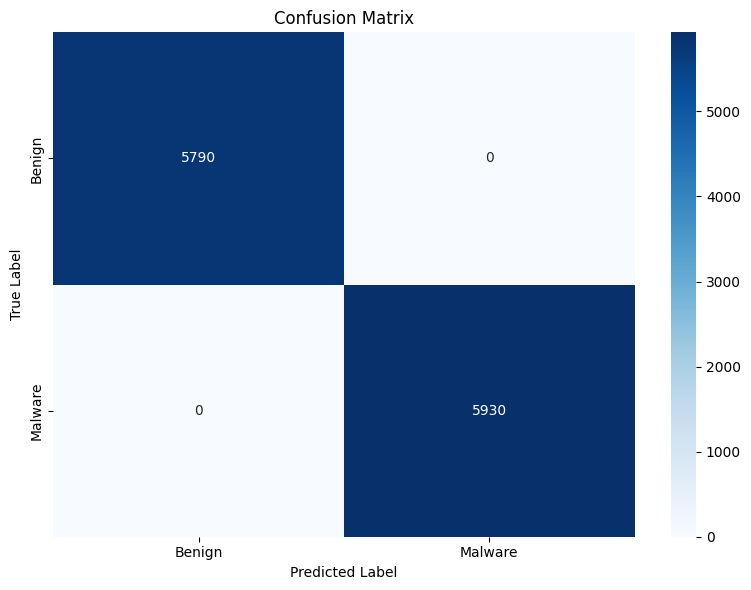

In [24]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
class_names = model_classes # Use the already available model_classes from kernel state
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=class_names,yticklabels=class_names) # Fix: Separate class_names assignment, use class_names for yticklabels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# The following lines for ROC curve and histogram are commented out
# as variables like fpr, tpr, roc_auc are not defined and y_prob is 2D.
# For multiclass classification, ROC curve plotting often requires plotting
# one-vs-rest for each class or micro/macro averages, and probability histograms
# may need specific handling of the 2D y_prob array (e.g., plotting confidence of prediction).

# plt.figure(figsize=(6,5))
# # This part requires fpr, tpr, roc_auc to be defined.
# # plt.plot(fpr,tpr,label=f"ROC Curve(AUV={roc_auc:;2f})")
# # plt.plot([0,1],[0,1],linestyle="--", color="gray") # Fix: Missing comma
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend()
# plt.tight_layout()
# plt.show()

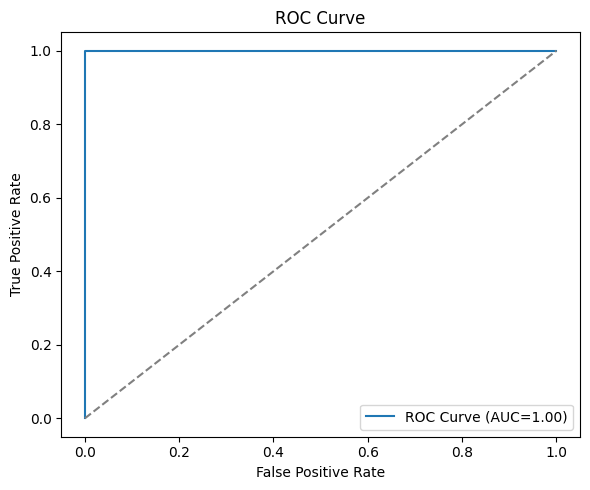

In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np # Ensure numpy is imported for conditional check

# Assuming y_test_filtered, y_prob_filtered, model_classes, and roc_auc_val are available from previous cell.

# Handle case where ROC AUC was not applicable (e.g., less than 2 classes in filtered y_test)
if not isinstance(roc_auc_val, (float, np.floating)):
    print(f"ROC Curve cannot be plotted: {roc_auc_val}")
else:
    # Binarize the true labels for multi-class ROC calculation
    lb = LabelBinarizer()
    lb.fit(model_classes) # Fit on all possible classes the model knows
    y_test_binarized = lb.transform(y_test_filtered)

    # Compute micro-average ROC curve and ROC area
    # Use probabilities of the positive class only for roc_curve
    # Assuming 'Malware' is the positive class and corresponds to the second column (index 1)
    fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_prob_filtered[:, 1])
    roc_auc = auc(fpr, tpr) # This will be the AUC for the binary classification

    plt.figure(figsize=(6,5))
    plt.plot(fpr,tpr,label=f"ROC Curve (AUC={roc_auc:.2f})")
    plt.plot([0,1],[0,1],linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve") # Changed title to reflect binary ROC
    plt.legend()
    plt.tight_layout()
    plt.show()

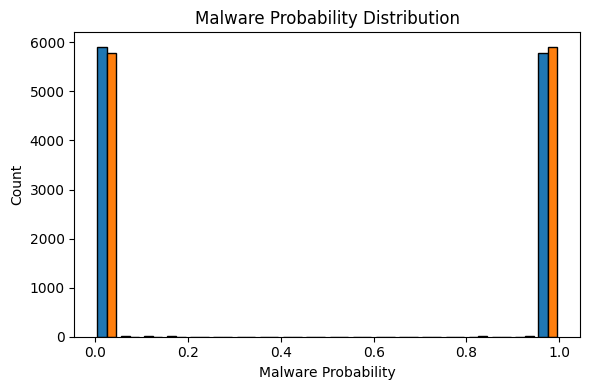

In [27]:
plt.figure(figsize=(6,4))
plt.hist(y_prob,bins=20,edgecolor="black")
plt.title("Malware Probability Distribution")
plt.xlabel("Malware Probability")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

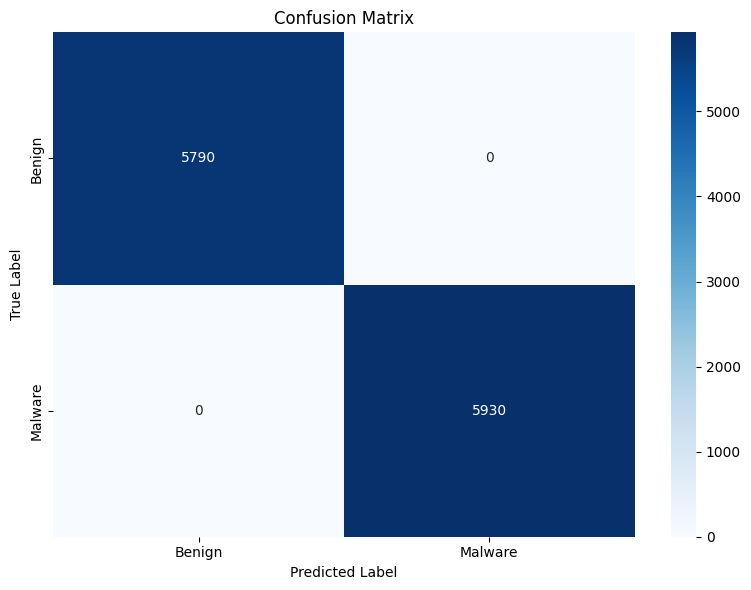

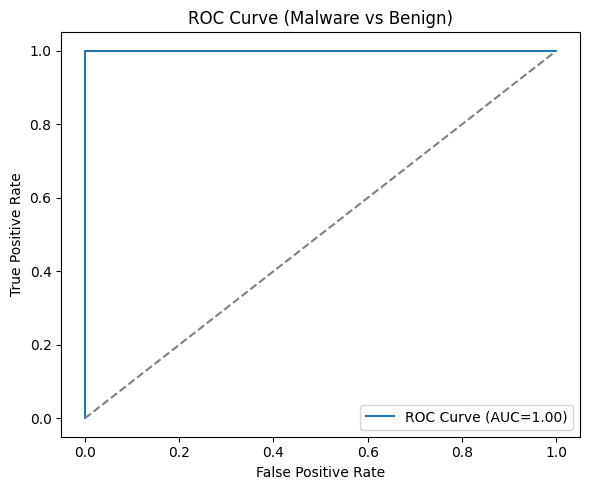

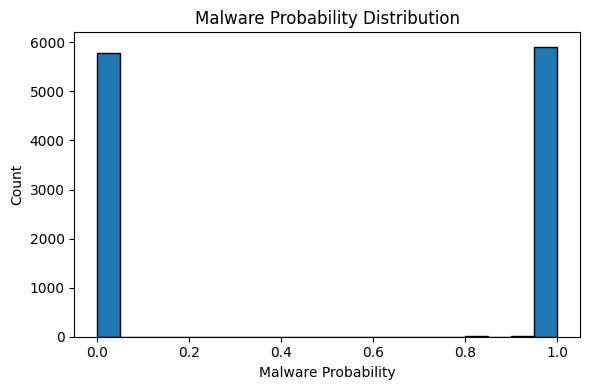

In [29]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(8, 6)) # Increased overall figure size for clarity
class_names = model_classes # Use the already available model_classes from kernel state
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()


# ROC curve and Probability Distribution plots remain below as previously defined
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np # Ensure numpy is imported for conditional check

if not isinstance(roc_auc_val, (float, np.floating)):
    print(f"ROC Curve cannot be plotted: {roc_auc_val}")
else:
    lb = LabelBinarizer()
    lb.fit(model_classes)
    y_test_binarized = lb.transform(y_test_filtered)

    # Fix: Use probabilities of the positive class (index 1) for roc_curve
    fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_prob_filtered[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,5))
    plt.plot(fpr,tpr,label=f"ROC Curve (AUC={roc_auc:.2f})")
    plt.plot([0,1],[0,1],linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve (Malware vs Benign)") # Updated title to reflect binary nature
    plt.legend()
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(6,4))
# Fix: Plot histogram for the positive class probabilities or choose one for clarity
plt.hist(y_prob[:, 1], bins=20, edgecolor="black") # Plotting probabilities of 'Malware' class
plt.title("Malware Probability Distribution")
plt.xlabel("Malware Probability")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [32]:
import pandas as pd
import numpy as np

# Original sample data provided by the user
user_sample_data = {
    'FileName': 'test_file.dll',
    'md5Hash': 'dummyhash1234567890abcdef1234567890',
    'Machine': 332,
    'DebugRVA': 0,
    'MajorImageVersion': 0,
    'MajorOSVersion': 4,
    'ExportRVA': 0,
    'ExportSize': 0,
    'IatVRA': 8192,
    'MajorLinkerVersion': 8,
    'MinorLinkerVersion': 0,
    'NumberOfSections': 3,
    'SizeOfStackReserve': 1048576,
    'DllCharacteristics': 34112,
    'ResourceSize': 672,
    'BitcoinAddresses': 0,
    'Benign': 1 # This column was not a feature in the training data 'x'
}

# Create a dictionary to hold the full sample data, matching the training columns
full_sample_dict = {}

# Get all expected column names from x_train
expected_columns = x_train.columns

# Fill with values from user_sample_data or default values (mean for numeric, mode for categorical)
for col in expected_columns:
    if col in user_sample_data: # Use provided value if available
        full_sample_dict[col] = user_sample_data[col]
    elif col == 'Category': # Special handling for the 'Category' categorical column
        full_sample_dict[col] = x_train['Category'].mode()[0] # Use the most frequent category
    elif pd.api.types.is_numeric_dtype(x_train[col]): # For other numeric columns, use the mean
        full_sample_dict[col] = x_train[col].mean()
    else:
        # Fallback for any other column types if necessary (though not expected for this dataset)
        full_sample_dict[col] = None # Or an empty string, depending on the type

# Create the sample DataFrame, ensuring all values are in lists for DataFrame construction
sample = pd.DataFrame([full_sample_dict])

pred=model.predict(sample)[0]
prob_index = np.where(model.named_steps['classifier'].classes_ == pred)[0][0]
prob=model.predict_proba(sample)[0][prob_index]
print("\n===SAMPLE PREDICTION===")
print("PREDICTION :",pred)
print("PROBABILITY :",prob)


===SAMPLE PREDICTION===
PREDICTION : Benign
PROBABILITY : 0.68
